In [ ]:
# номер варианта

variant = 1%9+1
variant ## 2 => house data

2

# 1-ое задание

In [ ]:
# библиотеки и модули
import pandas, seaborn
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
csv_table = pandas.read_csv('data.csv')
df = pandas.DataFrame(csv_table)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
# количество пропущенных значений

print(df.isnull().values.any()) ## False => таковых нет

False


In [ ]:
# распределение значений переменных

for column in df.columns:
  print(df[column].value_counts())

Судя по распределению значений, неинформативными колонками являются country - всего 1 значение (USA) и date - все даты в пределах 3 месяцев.

In [ ]:
# корреляции

columns_names = df.drop(columns=['country','date']).columns
features_correlations = df[columns_names].corr()
features_visualize = features_correlations.style.background_gradient(cmap="Greys")
features_visualize.set_caption('Features correlations')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


Выводы по первому заданию: пропущенных значений нет ; наибольшая корреляция с ценой наблюдается с признаком sqft_living.

# 2-ое задание

In [ ]:
# разделение на обучающую и тестовую выборки

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}

X = df.drop(columns=['country','price','date'])

label.fit(X['street'].drop_duplicates())
dicts['street'] = list(label.classes_)
X['street'] = label.transform(X['street'])

label.fit(X['statezip'].drop_duplicates())
dicts['statezip'] = list(label.classes_)
X['statezip'] = label.transform(X['statezip'])

X = pandas.get_dummies(X, columns = ['city'])
Y = df['price']
X_train, Y_train, X_test, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
# линейная регрессия

linreg = LinearRegression().fit(X_train,X_test)
Y_pred = linreg.predict(Y_train)
print('MSE:',mean_squared_error(Y_test, Y_pred),'\\','R2_SCORE:',r2_score(Y_test, Y_pred))

MSE: 31970796374.729694 \ R2_SCORE: 0.7317289577147721


In [ ]:
# коэффициенты

coeff_df = pandas.DataFrame(linreg.coef_, X_train.columns, columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-3.996297e+04
bathrooms,3.512203e+04
sqft_living,1.408781e+02
sqft_lot,-1.369173e-01
floors,-1.783984e+04
waterfront,4.343512e+05
view,5.339648e+04
condition,3.465068e+04
sqft_above,1.132800e+02
sqft_basement,2.759802e+01


In [ ]:
print(sm.OLS(Y, X).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     29.68
Date:                Wed, 24 Nov 2021   Prob (F-statistic):          4.56e-261
Time:                        16:50:25   Log-Likelihood:                -66725.
No. Observations:                4600   AIC:                         1.336e+05
Df Residuals:                    4543   BIC:                         1.339e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
bedrooms                

Выводы: наиболее информативными оказались критерии sqft_above и sqft_living.

# 3-е задание

In [ ]:
gbc = GradientBoostingRegressor(subsample=0.5)
cv_results = cross_val_score(gbc, X, Y, cv=5).mean()
print("GBC cross-validation r2 = " + str(cv_results))

GBC cross-validation r2 = 0.27245821309975626


In [ ]:
linreg = LinearRegression()
cv_results = cross_val_score(regr, X, Y, cv=5).mean()
print("Linear regression cross-validation r2 = : " + str(cv_results))

Linear regression cross-validation r2 = : 0.5690887260046245


In [ ]:
Вывод: ошибка на кросс-валидации для линейной регрессии больше, чем для градиентного бустинга, чего и следовало ожидать.

# 4-ое задание

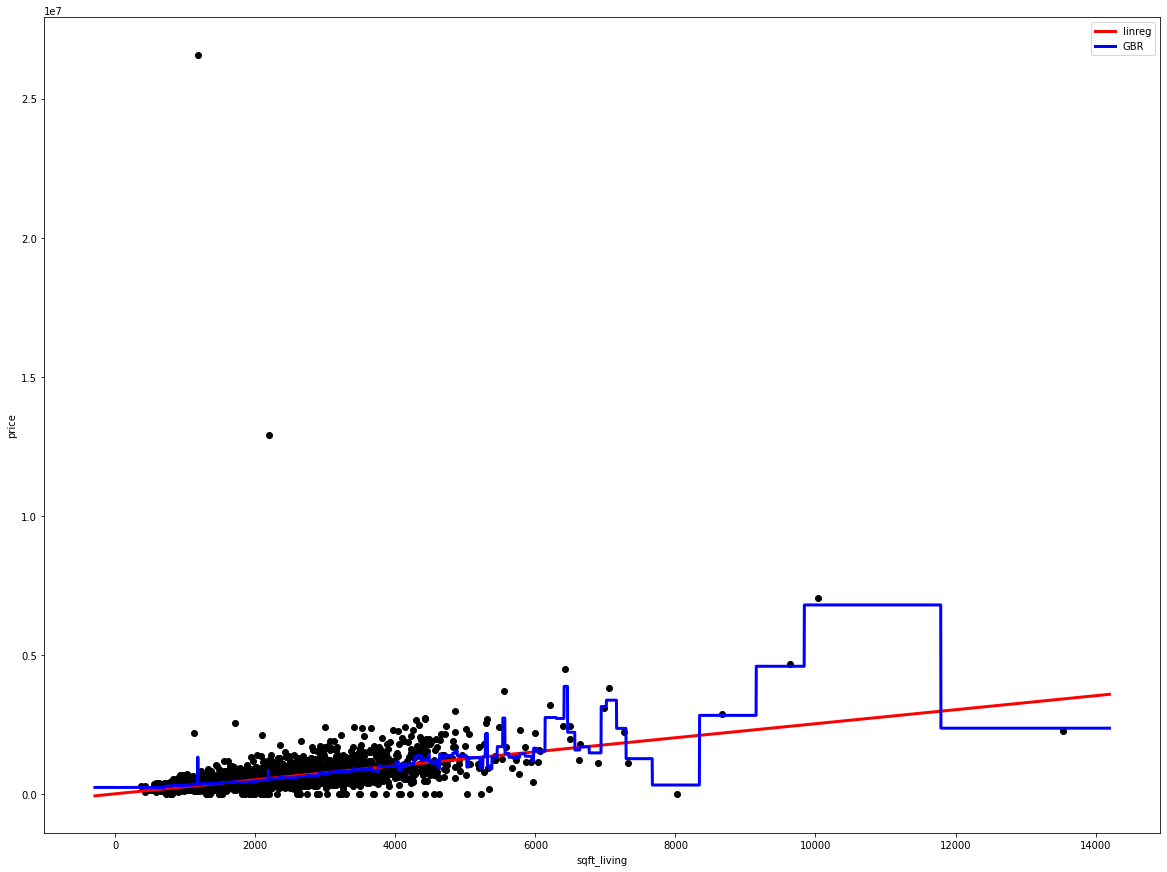

In [ ]:
info_feature = X['sqft_living']
gbc = GradientBoostingRegressor().fit(info_feature.values.reshape(-1, 1),Y)
linreg = LinearRegression().fit(info_feature.values.reshape(-1, 1), Y)
plt.rcParams["figure.figsize"] = 20,15
plt.scatter(info_feature, Y, color="black")
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx = np.linspace(x_min,x_max, num = len(info_feature))
plt.plot(xx, linreg.predict(xx.reshape(-1, 1)), color="red", linewidth=3,label = 'linreg')
plt.plot(xx, gbc.predict(xx.reshape(-1, 1)), color="blue", linewidth=3,label = 'GBR')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel(info_feature.name)
plt.ylabel(Y.name)
plt.show()